In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

In [18]:
os.chdir("D:\Cloudyml\Datatrained\DS2405Project\second phase")

In [3]:
os.getcwd()

'C:\\Users\\DELL\\project ml'

In [20]:
df = pd.read_csv("happy2.csv")

In [21]:
df.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [23]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


**EDA**

1. If mean is greater tha median(50%) than there is shewness in data . There might be skewness in standard error,trust and generosity
2. diferrenece between 75% and max, high than outlier: check standard error

In [24]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

**Checking duplicates**

In [25]:
df.duplicated().sum() 

0

In [26]:
# No duplicate here

In [27]:
corr = df.corr()
corr

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [28]:
import seaborn as sns

<AxesSubplot:>

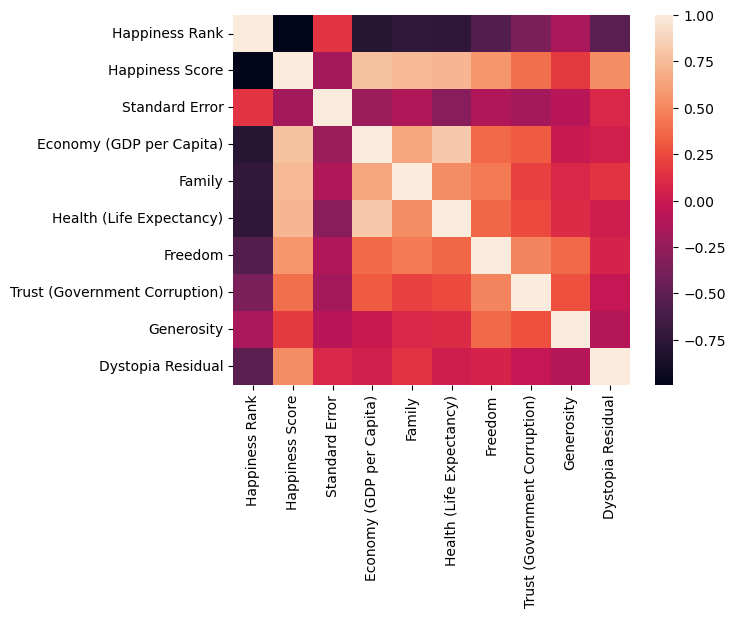

In [29]:
sns.heatmap(corr)

**Outlier**

Happiness Rank                      AxesSubplot(0.125,0.53;0.110714x0.35)
Happiness Score                  AxesSubplot(0.257857,0.53;0.110714x0.35)
Standard Error                   AxesSubplot(0.390714,0.53;0.110714x0.35)
Economy (GDP per Capita)         AxesSubplot(0.523571,0.53;0.110714x0.35)
Family                           AxesSubplot(0.656429,0.53;0.110714x0.35)
Health (Life Expectancy)         AxesSubplot(0.789286,0.53;0.110714x0.35)
Freedom                             AxesSubplot(0.125,0.11;0.110714x0.35)
Trust (Government Corruption)    AxesSubplot(0.257857,0.11;0.110714x0.35)
Generosity                       AxesSubplot(0.390714,0.11;0.110714x0.35)
Dystopia Residual                AxesSubplot(0.523571,0.11;0.110714x0.35)
dtype: object

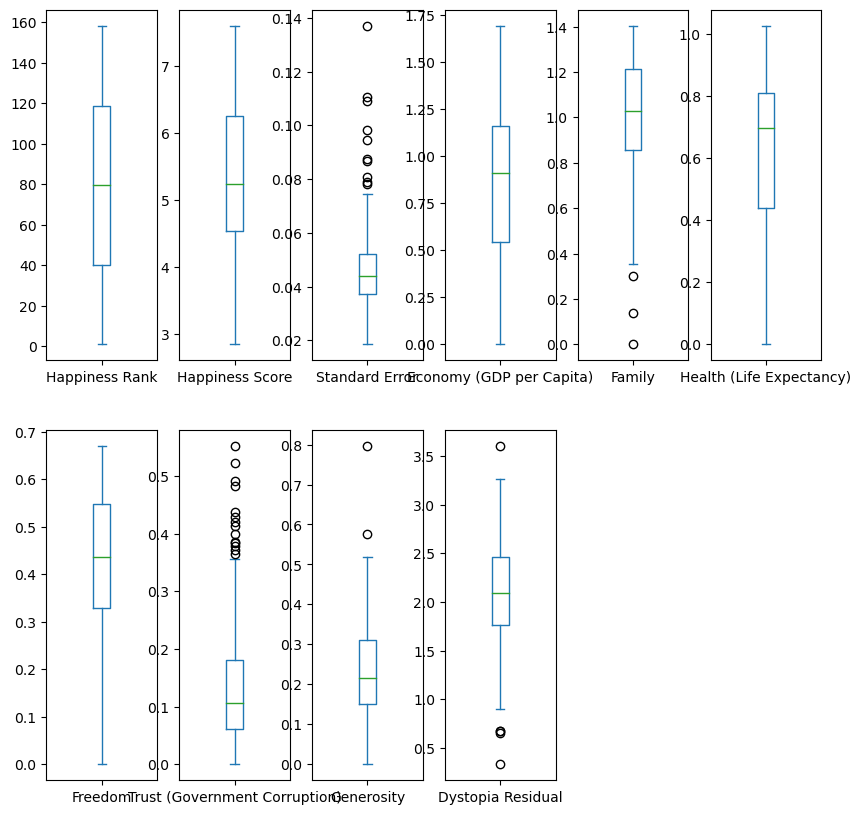

In [30]:
df.plot(kind="box",subplots=True,figsize=(10,10),layout=(2,6))

In [31]:
import warnings
warnings.filterwarnings('ignore')

- Removing hapiness score,country,region,happiness rank

In [32]:
x = df[["Standard Error","Economy (GDP per Capita)","Family","Health (Life Expectancy)","Generosity","Dystopia Residual","Happiness Score"]]

In [33]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Generosity,Dystopia Residual,Happiness Score
0,0.03411,1.39651,1.34951,0.94143,0.29678,2.51738,7.587
1,0.04884,1.30232,1.40223,0.94784,0.43630,2.70201,7.561
2,0.03328,1.32548,1.36058,0.87464,0.34139,2.49204,7.527
3,0.03880,1.45900,1.33095,0.88521,0.34699,2.46531,7.522
4,0.03553,1.32629,1.32261,0.90563,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.22628,0.67042,3.465
154,0.03656,0.28665,0.35386,0.31910,0.18260,1.63328,3.340
155,0.05015,0.66320,0.47489,0.72193,0.47179,0.32858,3.006
156,0.08658,0.01530,0.41587,0.22396,0.19727,1.83302,2.905


Standard Error                 AxesSubplot(0.125,0.53;0.110714x0.35)
Economy (GDP per Capita)    AxesSubplot(0.257857,0.53;0.110714x0.35)
Family                      AxesSubplot(0.390714,0.53;0.110714x0.35)
Health (Life Expectancy)    AxesSubplot(0.523571,0.53;0.110714x0.35)
Generosity                  AxesSubplot(0.656429,0.53;0.110714x0.35)
Dystopia Residual           AxesSubplot(0.789286,0.53;0.110714x0.35)
Happiness Score                AxesSubplot(0.125,0.11;0.110714x0.35)
dtype: object

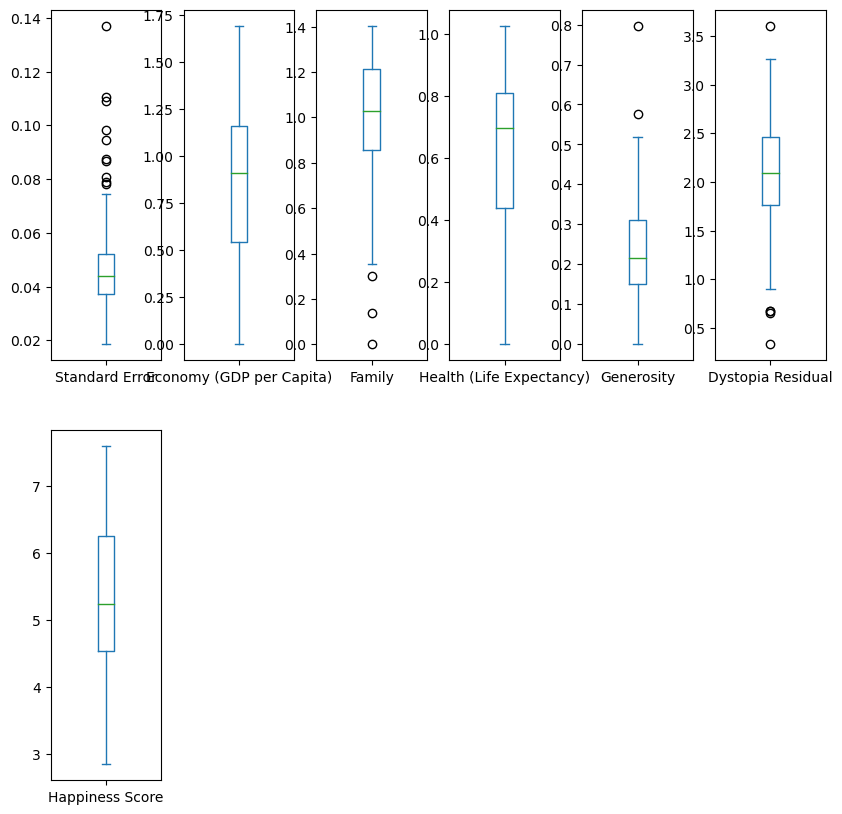

In [34]:
x.plot(kind="box",subplots=True,figsize=(10,10),layout=(2,6))

NameError: name 'df_new' is not defined

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

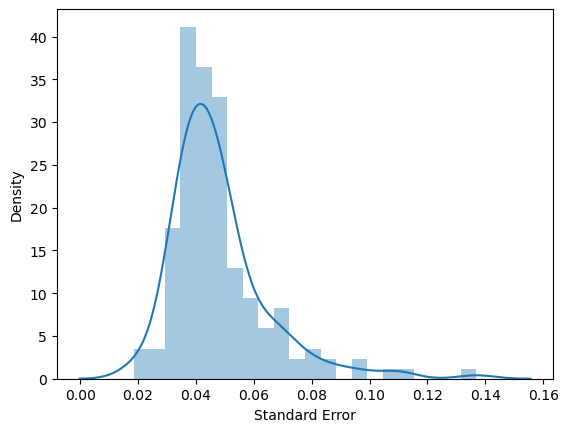

In [36]:
sns.distplot(x["Standard Error"]) # before outlier removing

**Remobving outlier**

In [37]:
from scipy.stats import zscore
zscore(x).head() # to get zscore of data

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Generosity,Dystopia Residual,Happiness Score
0,-0.805926,1.369621,1.320281,1.263408,0.471040,0.758258,1.937360
1,0.055889,1.135226,1.514458,1.289434,1.575856,1.092857,1.914581
2,-0.854487,1.192861,1.361054,0.992229,0.824293,0.712335,1.884792
3,-0.531526,1.525130,1.251922,1.035145,0.868638,0.663893,1.880411
4,-0.722845,1.194876,1.221204,1.118054,1.748563,0.639337,1.797179


In [38]:
z = np.abs(zscore(x)) 
# here "abs" is absolute and it all negative value to positive

In [39]:
threshold=3 # all the value which is bigger than 3 will be removed
# all the value which lies after third quartile

In [40]:
print(np.where(z>3))
# first first array is rows number and second rows number is columns number
# if we combine rows and column number than its our outier list

(array([ 40,  64, 115, 128, 147, 155, 157], dtype=int64), array([0, 0, 0, 4, 2, 5, 2], dtype=int64))


In [41]:
z.iloc[40,0] # bigger than three

3.5727739331415806

In [42]:
z.iloc[64,0] # bigger than three

5.209813157066768

In [43]:
# removing all the oulier 

In [44]:
df_new = x[(z<3).all(axis=1)]

In [45]:
df_new.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Generosity,Dystopia Residual,Happiness Score
0,0.03411,1.39651,1.34951,0.94143,0.29678,2.51738,7.587
1,0.04884,1.30232,1.40223,0.94784,0.43630,2.70201,7.561
2,0.03328,1.32548,1.36058,0.87464,0.34139,2.49204,7.527
3,0.03880,1.45900,1.33095,0.88521,0.34699,2.46531,7.522
4,0.03553,1.32629,1.32261,0.90563,0.45811,2.45176,7.427


In [46]:
df_new.shape # new data shape

(151, 7)

In [47]:
x.shape  # old data shape

(158, 7)

In [48]:
z.iloc[0,0] # zscore is less than 3

0.8059256922537386

Standard Error                 AxesSubplot(0.125,0.53;0.110714x0.35)
Economy (GDP per Capita)    AxesSubplot(0.257857,0.53;0.110714x0.35)
Family                      AxesSubplot(0.390714,0.53;0.110714x0.35)
Health (Life Expectancy)    AxesSubplot(0.523571,0.53;0.110714x0.35)
Generosity                  AxesSubplot(0.656429,0.53;0.110714x0.35)
Dystopia Residual           AxesSubplot(0.789286,0.53;0.110714x0.35)
Happiness Score                AxesSubplot(0.125,0.11;0.110714x0.35)
dtype: object

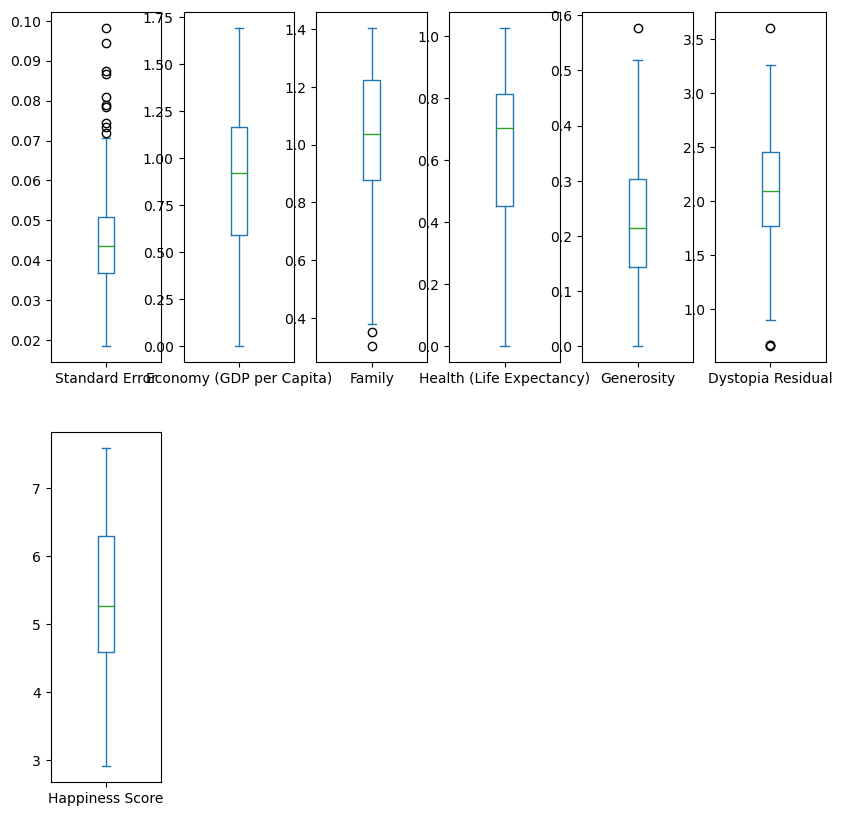

In [49]:
df_new.plot(kind="box",subplots=True,figsize=(10,10),layout=(2,6))

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

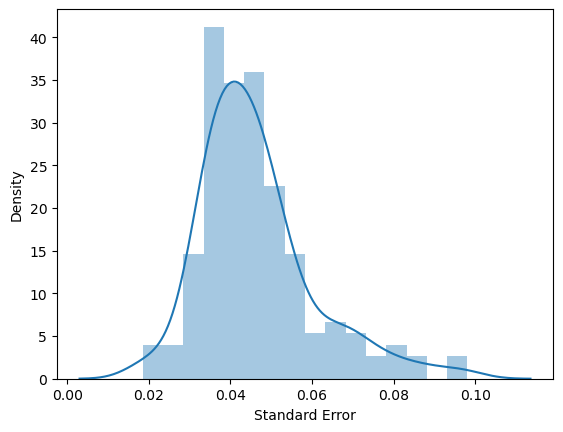

In [50]:
sns.distplot(df_new["Standard Error"]) # after outlier removing

In [51]:
import seaborn as sns

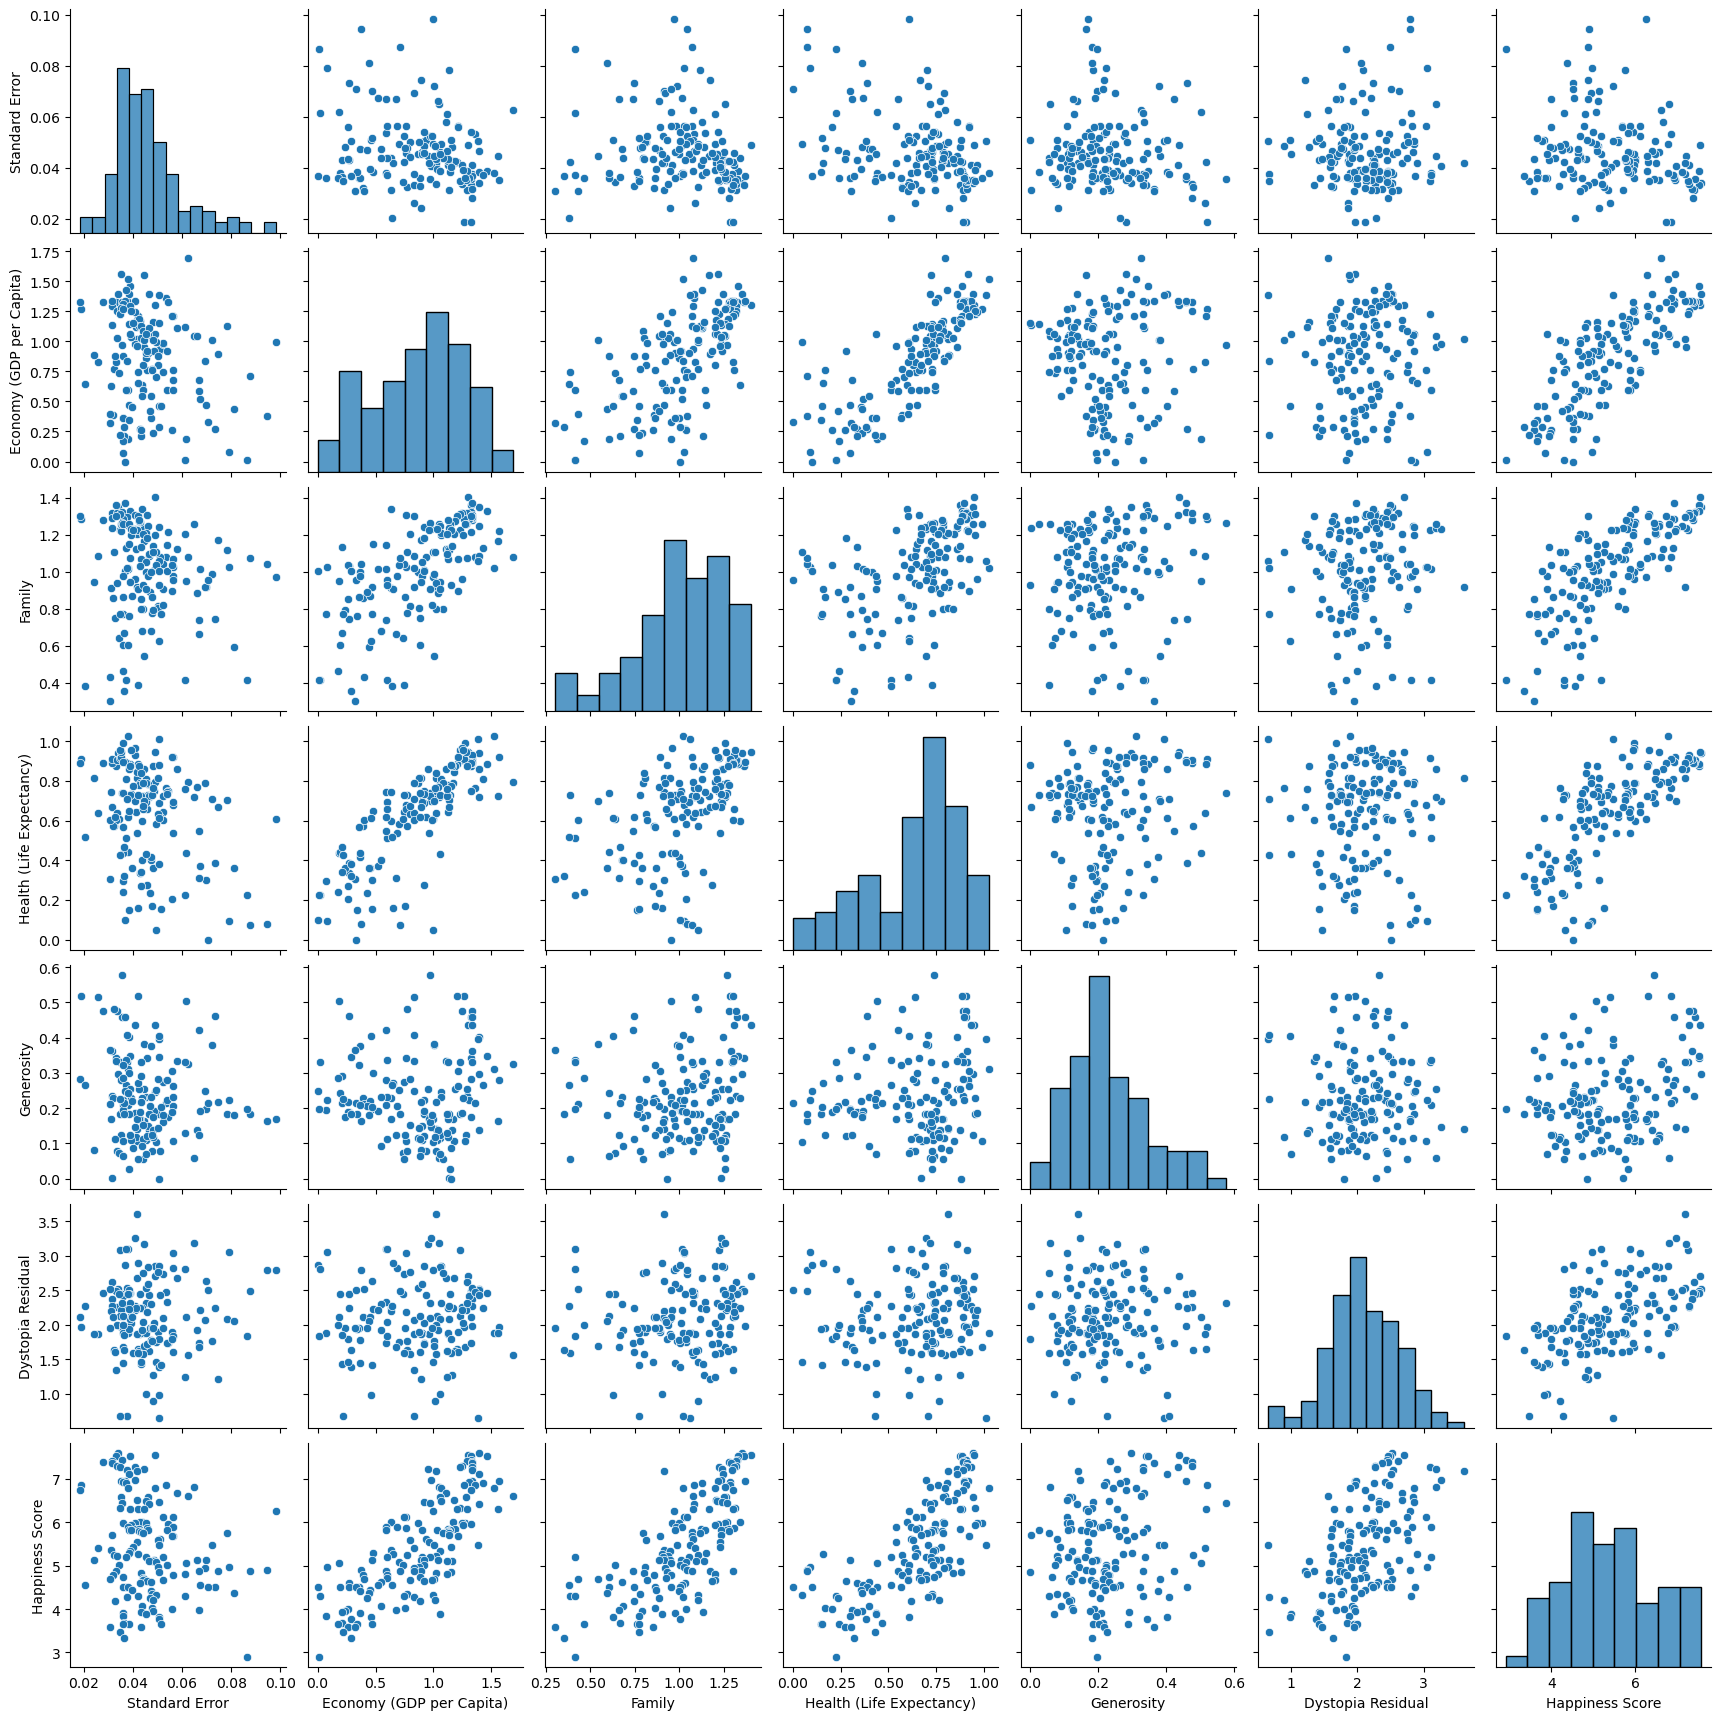

In [52]:
sns.pairplot(df_new)

**SKEWNESS**

In [53]:
#plt.figure(figsize=(20,25),facecolor="green")
#plotnumber = 1
#
#for column in x:
#    if plotnumber<=18:
#        ax=plt.subplot(6,4,plotnumber)
#        sns.displot(df[column],color='b')
#        plt.xlabel(column,fontsize=20)
#    plotnumber +=1
#plt.show()---
    

In [54]:
df_new.skew()

Standard Error              1.225872
Economy (GDP per Capita)   -0.341892
Family                     -0.801065
Health (Life Expectancy)   -0.742160
Generosity                  0.643216
Dystopia Residual          -0.084818
Happiness Score             0.149261
dtype: float64

In [80]:
#removing skewness acceptable value -0.5 to 0.5
#df["volume"] = np.cbrt(df[""])

- correlaction positive between economy and health.

In [56]:
corr = df_new.corr()
corr

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Generosity,Dystopia Residual,Happiness Score
Standard Error,1.000000,-0.218921,-0.129181,-0.342924,-0.124451,0.050922,-0.207617
Economy (GDP per Capita),-0.218921,1.000000,0.625765,0.813326,0.031698,0.040136,0.778354
Family,-0.129181,0.625765,1.000000,0.506898,0.154966,0.129172,0.721363
Health (Life Expectancy),-0.342924,0.813326,0.506898,1.000000,0.132227,0.041067,0.730734
Generosity,-0.124451,0.031698,0.154966,0.132227,1.000000,-0.037826,0.252951
Dystopia Residual,0.050922,0.040136,0.129172,0.041067,-0.037826,1.000000,0.530371
Happiness Score,-0.207617,0.778354,0.721363,0.730734,0.252951,0.530371,1.000000


<AxesSubplot:>

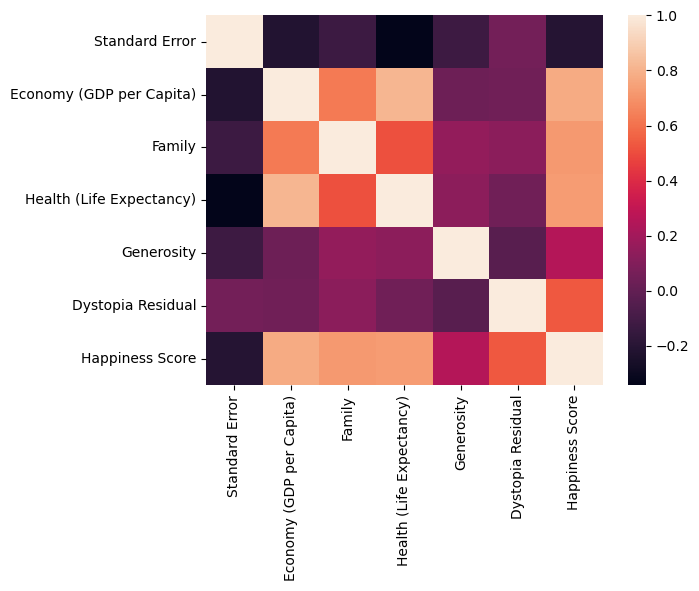

In [57]:
sns.heatmap(corr)

- standard error and health life is correlated again
- Economy (GDP per capital) and standar error is correlated 
- so droping standard error

In [ ]:
#df1 = df_new.drop("Standard Error",axis = 1)
#df1

**Features and target**

In [58]:
x2 = df_new.drop("Happiness Score",axis=1)
y2 = df_new["Happiness Score"]

In [86]:
print(x2.shape)
print(y2.shape)

(151, 6)
(151,)


**StanadardScaling**

In [59]:
from sklearn.preprocessing import  StandardScaler

In [60]:
standard = StandardScaler()

In [61]:
# spliting in to Features and Target
x1 = pd.DataFrame(standard.fit_transform(x2),columns=x2.columns)
x1

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Generosity,Dystopia Residual
0,-0.868886,1.355000,1.366988,1.240259,0.543863,0.765478
1,0.183403,1.115594,1.577725,1.266484,1.716827,1.110304
2,-0.928180,1.174460,1.411238,0.967001,0.918905,0.718152
3,-0.533840,1.513833,1.292799,1.010246,0.965985,0.668229
4,-0.767444,1.176519,1.259462,1.093791,1.900187,0.642922
...,...,...,...,...,...,...
146,-0.216653,-1.538484,-0.622180,-1.501646,-0.122907,-1.200123
147,-1.102490,-1.381659,-2.816809,-1.370315,1.118239,-0.290274
148,-0.831024,-1.630088,-0.934688,-0.857717,-0.048840,-2.684018
149,-0.693862,-1.465968,-2.612907,-1.305877,-0.416064,-0.885721


**train_test split**

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x1,y2,test_size=0.25,random_state=42)

In [64]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(113, 6)
(38, 6)
(113,)
(38,)


**Linear model**

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [66]:
lm = LinearRegression()

In [67]:
lm.fit(x_train,y_train)

LinearRegression()

In [68]:
# taking coefficient of 
lm.coef_

array([-0.01202569,  0.45465291,  0.28918714,  0.23313305,  0.21893843,
        0.54123153])

In [69]:
lmpredict = lm.predict(x_test)

In [70]:
mean_absolute_error(y_test,lmpredict)

0.15229616668839982

In [71]:
mean_squared_error(y_test,lmpredict) # lower mse better the model

0.03565836579441815

**Trying PCA**

In [72]:
from sklearn.decomposition import PCA

In [73]:
pca = PCA(n_components=2)

In [74]:
pca.fit(x2)

PCA(n_components=2)

In [75]:
x_pca = pca.transform(x2)

In [76]:
x2.shape # shape before transforming

(151, 6)

In [77]:
x_pca.shape # shpe after transforming

(151, 2)

In [78]:
x_pca # this numpy array so we should convert into pandas before going to model evalutaion 

array([[-0.56925161, -0.5784299 ],
       [-0.73859456, -0.48474753],
       [-0.52656082, -0.50447841],
       [-0.52158424, -0.61018252],
       [-0.48521507, -0.51750585],
       [-0.64000279, -0.43445301],
       [-0.49219426, -0.49625972],
       [-0.40445102, -0.52912541],
       [-0.28966214, -0.50329527],
       [-0.30780824, -0.57383978],
       [-1.07292258, -0.25199488],
       [-1.10688884,  0.00468673],
       [-0.56160389, -0.48754231],
       [-1.48238333,  0.19525485],
       [-0.5395644 , -0.5094697 ],
       [-1.17488544,  0.0802716 ],
       [-0.04850065, -0.78541959],
       [-0.03080273, -0.6522823 ],
       [-0.44112481, -0.48891204],
       [-0.26962908, -0.5286694 ],
       [-0.00260981, -0.57634665],
       [-0.46763565, -0.38348602],
       [-1.12539483, -0.00220376],
       [ 0.05738791, -0.74795053],
       [-0.79575886, -0.11722565],
       [-0.15590326, -0.58128853],
       [-0.63214751, -0.19571825],
       [ 0.3605677 , -0.88167009],
       [-0.24034695,

In [79]:
# check how much variance is explained by each principal component
print(pca.explained_variance_ratio_)


[0.50372776 0.38698007]


In [ ]:
# creating new features and target variable for pca

In [91]:
x3 = pd.DataFrame(x_pca) # converting numpy array to pandas dataframe
y3 = df_new["Happiness Score"]

In [93]:
x3

,0,1
0,-0.569252,-0.578430
1,-0.738595,-0.484748
2,-0.526561,-0.504478
3,-0.521584,-0.610183
4,-0.485215,-0.517506
...,...,...
146,0.789198,0.538695
147,0.377495,0.787474
148,1.560461,0.334702
149,0.683273,0.715988


In [94]:
print(x3.shape)
print(y3.shape)

(151, 2)
(151,)


In [ ]:
# standrd scaler for pca

In [87]:
from sklearn.preprocessing import  StandardScaler

In [88]:
pca_standard = StandardScaler()

In [95]:
#spliting in to Features and Target
x4 = pd.DataFrame(pca_standard.fit_transform(x3),columns=x3.columns)
x4

,0,1
0,-1.054844,-1.222893
1,-1.368643,-1.024833
2,-0.975736,-1.066548
3,-0.966515,-1.290023
4,-0.899121,-1.094090
...,...,...
146,1.462413,1.138888
147,0.699511,1.664845
148,2.891591,0.707613
149,1.266130,1.513713


In [97]:
x_train,x_test,y_train,y_test = train_test_split(x4,y3,test_size=0.25,random_state=42)


In [98]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(113, 2)
(38, 2)
(113,)
(38,)


In [102]:
lm1 = LinearRegression()

In [103]:
lm.fit(x_train,y_train)

LinearRegression()

In [104]:
predict = lm.predict(x_test)

In [106]:
mean_squared_error(y_test,predict) # lower mse better the model
# normal linear regression is better

0.07357437489064769

In [107]:
mean_absolute_error(y_test,predict) # here also linaer regressor is best below 10%

0.23720597209165667

**KNNRegressor**

In [ ]:
class sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, *, weights='uniform', 
                                            algorithm='auto', leaf_size=30, p=2, metric='minkowski',
                                            metric_params=None, n_jobs=None)[source]


In [109]:
from sklearn.neighbors import KNeighborsRegressor

In [110]:
KNN = KNeighborsRegressor()

In [111]:
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [112]:
knnpredict = KNN.predict(x_test)

In [114]:
mean_squared_error(y_test,knnpredict)

0.11258581263157896

# **GridSearch**

**GridSearch with LinearRegression**

In [166]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [128]:
svc_para = {"kernel":["linear"],
           "C" :[2],
           "gamma":["scale"],
           "degree":[3],
           "coef0":[2]}

In [129]:
SVC1 = SVR()

In [130]:
grid_search = GridSearchCV(estimator=SVC1,param_grid=svc_para,cv=5,n_jobs=-1)

In [131]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [2], 'coef0': [2], 'degree': [3],
                         'gamma': ['scale'], 'kernel': ['linear']})

In [133]:
best_parameters = grid_search.best_params_
best_parameters

{'C': 2, 'coef0': 2, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}

In [136]:
svr = SVR(C= 2, coef0= 2, degree= 3, gamma= 'scale', kernel= 'linear')

In [137]:
svr.fit(x_train,y_train)

SVR(C=2, coef0=2, kernel='linear')

In [139]:
svr.score(x_train,y_train)

0.9161056701176723

**Random Forest**

In [ ]:
"""class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, 
                                              min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                              max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                              n_jobs=None, random_state=None, verbose=0, warm_start=False, 
                                              class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)"""

In [143]:
from sklearn.ensemble import RandomForestRegressor

In [144]:
ran = RandomForestRegressor()

In [145]:
ran.fit(x_train,y_train)

RandomForestRegressor()

In [146]:
ranpredict = ran.predict(x_test)

In [147]:
mean_squared_error(y_test,ranpredict)

0.09581615194999982

In [ ]:
ran1= RandomForestRegressor()

**GridSearch for Decision tree**

In [ ]:
'''class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, 
                                         min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                                         random_state=None, max_leaf_nodes=None, 
                                         min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None)''''''

In [ ]:
'''class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, 
                                         min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                         max_features=None, random_state=None, max_leaf_nodes=None, 
                                         min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None)'''

In [148]:
from sklearn.tree import DecisionTreeRegressor

In [149]:
Dec = DecisionTreeRegressor()

In [150]:
Dec.fit(x_train,y_train)

DecisionTreeRegressor()

In [151]:
Decpredict = Dec.predict(x_test)

In [155]:
from sklearn.metrics import mean_absolute_error

In [160]:
from sklearn.metrics import r2_score

In [162]:
r2_score(y_test,Decpredict) # model is really good

0.8772150845270072

In [ ]:
# deccison tree grid search b

In [171]:
grid_param = { "min_samples_split":range(1,20),
              "max_leaf_nodes":range(1,25,2),
              "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "max_depth":range(1,20,3)}

In [172]:
Dec1 = DecisionTreeRegressor()

In [173]:
grid = GridSearchCV(estimator=Dec1,param_grid=grid_param,cv=5,n_jobs=-1)

In [174]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': range(1, 20, 3),
                         'max_leaf_nodes': range(1, 25, 2),
                         'min_samples_split': range(1, 20)})

In [175]:
best_grid = grid.best_params_

In [176]:
best_grid

{'criterion': 'absolute_error',
 'max_depth': 16,
 'max_leaf_nodes': 23,
 'min_samples_split': 2}

In [177]:
dec2 = DecisionTreeRegressor(criterion='absolute_error',
 max_depth= 16,
 max_leaf_nodes= 23,
 min_samples_split= 2)

In [178]:
dec2.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=16,
                      max_leaf_nodes=23)

In [179]:
dec2.score(x_train,y_train)

0.955838779694863

# Titanic

In [4]:
os.chdir("D:\Cloudyml\Datatrained\DS2405Project\second phase")

In [5]:
os.getcwd()

'D:\\Cloudyml\\Datatrained\\DS2405Project\\second phase'

In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("titanic.csv")

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803.00,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450.00,8.0500,NaN,S


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df.shape

(891, 12)

In [17]:
Age=df["Age"].fillna(df["Age"].sum()) # filling with it mean

In [18]:
Age.shape

(891,)

In [21]:
Age.isnull().sum()

0

In [22]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
#concating age 

In [23]:
df.drop("Age",axis=1,inplace=True)

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803.00,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450.00,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536.00,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053.00,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369.00,30.0000,C148,C


In [27]:
pd.concat([df,Age],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.00
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.00
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.00
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803.00,53.1000,C123,S,35.00
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450.00,8.0500,NaN,S,35.00
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536.00,13.0000,NaN,S,27.00
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053.00,30.0000,B42,S,19.00
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,21205.17
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369.00,30.0000,C148,C,26.00
